<h1> Time Series Analysis for Snacks in 'Indranagar'</h1>

<h2>Exploring (EDA)data to indentify trends and patterns</h2>

In [55]:
#import necceseary libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
from statsmodels.tsa.seasonal import seasonal_decompose 

In [56]:
# Loading the dataset for analysis
analysis_data=pd.read_csv(r'C:\Users\vs390\OneDrive\Desktop\Swiggy instamart delivery prediction\data\test.csv')
analysis_data.head(2)

,DateTime,Date,Hour,Day_of_Week,Location,Product,Order_Volume,Weather,Traffic,Is_Holiday,...,Distance_to_Warehouse,Customer_Age_Group,Feedback_Score,Item_Returned,Discount_Amount,Gift_Wrapping_Requested,Time_Since_Last_Order,Weather_Severity,Traffic_Congestion_Index,Warehouse_Proximity_Score
0,2023-01-01 00:00:00,2023-01-01,0,Sunday,Koramangala,Milk,143,Clear,Moderate,0,...,19.320305,26-35,4.089132,True,80.454587,True,23.395002,1.366587,1.985490,7.916775
1,2023-01-01 00:00:00,2023-01-01,0,Sunday,Koramangala,Bread,121,Clear,Moderate,0,...,16.529100,18-25,4.403027,False,43.380880,True,20.877744,1.421246,1.043545,5.236938


In [57]:
# Displaying the information about the dataset, including the number of non-null entries and the data types of each column
analysis_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131055 entries, 0 to 131054
Data columns (total 43 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   DateTime                     131055 non-null  object 
 1   Date                         131055 non-null  object 
 2   Hour                         131055 non-null  int64  
 3   Day_of_Week                  131055 non-null  object 
 4   Location                     131055 non-null  object 
 5   Product                      131055 non-null  object 
 6   Order_Volume                 131055 non-null  int64  
 7   Weather                      131055 non-null  object 
 8   Traffic                      131055 non-null  object 
 9   Is_Holiday                   131055 non-null  int64  
 10  Promotion                    74895 non-null   object 
 11  Customer_Rating              131055 non-null  float64
 12  Distance_to_Customer         131055 non-null  float64
 13 

In [58]:
# Displaying summary statistics of the dataset, including count, mean, standard deviation, min, max, and quartiles for each numeric column
analysis_data.describe()

,Hour,Order_Volume,Is_Holiday,Customer_Rating,Distance_to_Customer,Warehouse_Stock_Level,Average_Preparation_Time,Delivery_Staff_Availability,Temperature,Humidity,...,Seasonal_Demand_Factor,Order_Frequency,Average_Order_Value,Distance_to_Warehouse,Feedback_Score,Discount_Amount,Time_Since_Last_Order,Weather_Severity,Traffic_Congestion_Index,Warehouse_Proximity_Score
count,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,...,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000,131055.000000
mean,11.498684,186.978116,0.010988,4.001241,7.738285,5251.224364,12.520945,25.446996,27.442987,59.949845,...,1.150446,5.500187,549.598448,10.484298,4.002639,49.939542,15.008348,1.251417,1.250972,5.510312
std,6.922910,113.856596,0.104245,0.577467,4.189325,2737.110791,4.338912,14.428719,7.214370,17.340146,...,0.201802,2.877272,259.797596,5.482059,0.577086,28.880152,8.663951,0.433150,0.432839,2.590764
min,0.000000,80.000000,0.000000,3.000001,0.500075,500.000000,5.000116,1.000000,15.000120,30.000691,...,0.800007,1.000000,100.000713,1.000029,3.000020,0.000010,0.000131,0.500002,0.500026,1.000016
25%,5.000000,114.000000,0.000000,3.498508,4.100091,2888.000000,8.764904,13.000000,21.180931,44.917260,...,0.976320,3.000000,324.719657,5.721243,3.503016,24.946042,7.521753,0.877262,0.875364,3.276227
50%,11.000000,136.000000,0.000000,4.004470,7.731209,5244.000000,12.531838,25.000000,27.413058,59.931597,...,1.150270,6.000000,550.133017,10.472986,4.005176,49.926669,15.019368,1.250025,1.251652,5.508709
75%,17.000000,175.000000,0.000000,4.499205,11.367584,7621.000000,16.299481,38.000000,33.674739,74.953814,...,1.325623,8.000000,774.598225,15.233410,4.502309,74.957024,22.516458,1.627430,1.624996,7.750759
max,23.000000,487.000000,1.000000,4.999987,14.999970,10000.000000,19.999984,50.000000,39.999951,89.999720,...,1.499994,10.000000,999.994965,19.999728,4.999979,99.999577,29.999872,1.999987,1.999989,9.999961


In [59]:
# Checking for missing (null) values in each column and displaying the total count of null values per column
analysis_data.isnull().sum()

DateTime                           0
Date                               0
Hour                               0
Day_of_Week                        0
Location                           0
Product                            0
Order_Volume                       0
Weather                            0
Traffic                            0
Is_Holiday                         0
Promotion                      56160
Customer_Rating                    0
Distance_to_Customer               0
Warehouse_Stock_Level              0
Average_Preparation_Time           0
Delivery_Staff_Availability        0
Temperature                        0
Humidity                           0
Air_Quality_Index                  0
Vehicle_Type                       0
Order_Priority                     0
Coupon_Used                        0
Previous_Order_Cancellation        0
Delivery_Speed                     0
Staff_Experience_Level             0
Fuel_Cost                          0
Packaging_Cost                     0
C

In [60]:
# Filling missing values in the 'Promotion' column with the value 'No_Promotion'
analysis_data['Promotion']=analysis_data ['Promotion'].fillna('No_Prmotion')
analysis_data['Promotion'].unique()

array(['Weekend Bonanza', 'No_Prmotion', 'Midweek Madness'], dtype=object)

In [61]:
#  Basic Statistical Analysis (Mean, Median, etc.)
mean_order_volume =analysis_data['Order_Volume'].mean()
median_order_volume = analysis_data['Order_Volume'].median()
std_order_volume = analysis_data['Order_Volume'].std()
max_order_volume = analysis_data['Order_Volume'].max()
min_order_volume = analysis_data['Order_Volume'].min()

print(f"Mean Order Volume: {mean_order_volume}")
print(f"Median Order Volume: {median_order_volume}")
print(f"Standard Deviation of Order Volume: {std_order_volume}")
print(f"Maximum Order Volume: {max_order_volume}")
print(f"Minimum Order Volume: {min_order_volume}")

Mean Order Volume: 186.97811605814354
Median Order Volume: 136.0
Standard Deviation of Order Volume: 113.85659634888782
Maximum Order Volume: 487
Minimum Order Volume: 80


In [62]:
product_data=analysis_data[(analysis_data['Location']=='Indiranagar') &
                           (analysis_data['Product']=='Snacks')]
product_data

,DateTime,Date,Hour,Day_of_Week,Location,Product,Order_Volume,Weather,Traffic,Is_Holiday,...,Distance_to_Warehouse,Customer_Age_Group,Feedback_Score,Item_Returned,Discount_Amount,Gift_Wrapping_Requested,Time_Since_Last_Order,Weather_Severity,Traffic_Congestion_Index,Warehouse_Proximity_Score
12,2023-01-01 00:00:00,2023-01-01,0,Sunday,Indiranagar,Snacks,135,Clear,Moderate,0,...,12.081085,18-25,3.332258,False,80.321857,False,25.135066,1.806654,0.749798,1.096425
27,2023-01-01 01:00:00,2023-01-01,1,Sunday,Indiranagar,Snacks,140,Cloudy,Low,0,...,6.852030,26-35,3.338780,True,91.060010,True,12.643457,0.816269,1.559833,4.746831
42,2023-01-01 02:00:00,2023-01-01,2,Sunday,Indiranagar,Snacks,112,Clear,Moderate,0,...,8.155908,36-50,3.199987,True,23.716464,False,18.466016,0.502856,1.989804,4.539890
57,2023-01-01 03:00:00,2023-01-01,3,Sunday,Indiranagar,Snacks,113,Clear,Low,0,...,14.901856,50+,4.529405,False,38.859147,True,22.781295,1.928190,0.634814,6.804482
72,2023-01-01 04:00:00,2023-01-01,4,Sunday,Indiranagar,Snacks,131,Clear,High,0,...,8.817543,26-35,3.119251,True,2.103522,False,1.477678,0.574094,1.628282,7.306821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130992,2023-12-30 20:00:00,2023-12-30,20,Saturday,Indiranagar,Snacks,383,Clear,Low,0,...,4.996915,18-25,3.207626,True,50.048487,True,14.051958,0.541820,0.597544,1.733557
131007,2023-12-30 21:00:00,2023-12-30,21,Saturday,Indiranagar,Snacks,148,Rainy,Low,0,...,16.779051,18-25,4.228430,False,51.150336,False,8.775242,1.606043,0.573861,1.023637
131022,2023-12-30 22:00:00,2023-12-30,22,Saturday,Indiranagar,Snacks,172,Rainy,Low,0,...,1.081331,36-50,3.517173,True,12.792064,False,4.846920,1.140709,1.093860,1.739025
131037,2023-12-30 23:00:00,2023-12-30,23,Saturday,Indiranagar,Snacks,120,Cloudy,Low,0,...,7.077121,50+,3.803845,False,28.536142,True,13.427622,0.885947,1.338652,7.624588


In [63]:
# Assuming product_data is your dataframe and 'DateTime' column is in string format
product_data['DateTime'] = pd.to_datetime(product_data['DateTime'], errors='coerce')
product_data.loc[:,'Weekr'] = product_data['DateTime'].dt.isocalendar().week
product_data.loc[:,'Month'] = product_data['DateTime'].dt.month_name()
product_data.loc[:,'Season'] = (product_data['DateTime'].dt.month % 12 // 3 + 1).map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
product_data.loc[:,'Minute'] = product_data['DateTime'].dt.minute  
product_data

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\3754222028.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\3754222028.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\3754222028.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

,DateTime,Date,Hour,Day_of_Week,Location,Product,Order_Volume,Weather,Traffic,Is_Holiday,...,Discount_Amount,Gift_Wrapping_Requested,Time_Since_Last_Order,Weather_Severity,Traffic_Congestion_Index,Warehouse_Proximity_Score,Weekr,Month,Season,Minute
12,2023-01-01 00:00:00,2023-01-01,0,Sunday,Indiranagar,Snacks,135,Clear,Moderate,0,...,80.321857,False,25.135066,1.806654,0.749798,1.096425,52,January,Winter,0
27,2023-01-01 01:00:00,2023-01-01,1,Sunday,Indiranagar,Snacks,140,Cloudy,Low,0,...,91.060010,True,12.643457,0.816269,1.559833,4.746831,52,January,Winter,0
42,2023-01-01 02:00:00,2023-01-01,2,Sunday,Indiranagar,Snacks,112,Clear,Moderate,0,...,23.716464,False,18.466016,0.502856,1.989804,4.539890,52,January,Winter,0
57,2023-01-01 03:00:00,2023-01-01,3,Sunday,Indiranagar,Snacks,113,Clear,Low,0,...,38.859147,True,22.781295,1.928190,0.634814,6.804482,52,January,Winter,0
72,2023-01-01 04:00:00,2023-01-01,4,Sunday,Indiranagar,Snacks,131,Clear,High,0,...,2.103522,False,1.477678,0.574094,1.628282,7.306821,52,January,Winter,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130992,2023-12-30 20:00:00,2023-12-30,20,Saturday,Indiranagar,Snacks,383,Clear,Low,0,...,50.048487,True,14.051958,0.541820,0.597544,1.733557,52,December,Winter,0
131007,2023-12-30 21:00:00,2023-12-30,21,Saturday,Indiranagar,Snacks,148,Rainy,Low,0,...,51.150336,False,8.775242,1.606043,0.573861,1.023637,52,December,Winter,0
131022,2023-12-30 22:00:00,2023-12-30,22,Saturday,Indiranagar,Snacks,172,Rainy,Low,0,...,12.792064,False,4.846920,1.140709,1.093860,1.739025,52,December,Winter,0
131037,2023-12-30 23:00:00,2023-12-30,23,Saturday,Indiranagar,Snacks,120,Cloudy,Low,0,...,28.536142,True,13.427622,0.885947,1.338652,7.624588,52,December,Winter,0


In [64]:
# Monthly Order Volume Analysis
monthly_order_volume = product_data.groupby('Month')['Order_Volume'].sum().reset_index()
# Plotting Monthly Order Volume
fig = px.bar(monthly_order_volume, x='Month', y='Order_Volume', title='Monthly Order Volume', 
             labels={'Order_Volume': 'Total Orders'})
fig.show()

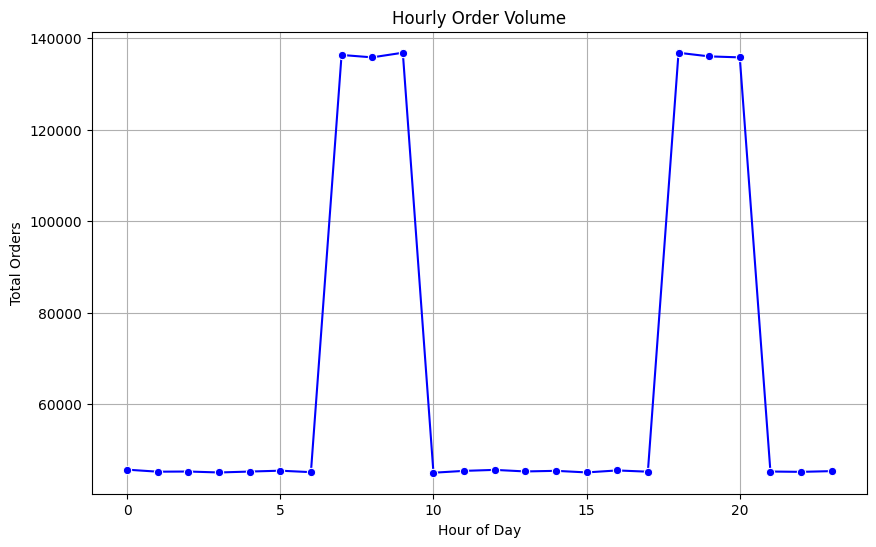

In [65]:
# Hourly Order Volume Analysis using Seaborn
hourly_order_volume = product_data.groupby('Hour')['Order_Volume'].sum().reset_index()
# Plotting Hourly Order Volume 
plt.figure(figsize=(10,6))
sns.lineplot(x='Hour', y='Order_Volume', data=hourly_order_volume, marker='o', color='b')
plt.title('Hourly Order Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()

In [66]:
#Promotion Impact Analysis 
promotion_impact = product_data.groupby('Promotion')['Order_Volume'].mean().reset_index()

# Plotting Promotion Impact 
fig = px.bar(promotion_impact, x='Promotion', y='Order_Volume', title='Effect of Promotions on Orders', 
             labels={'Promotion': 'Promotion (0: No, 1: Yes)', 'Order_Volume': 'Average Order Volume'})
fig.show()

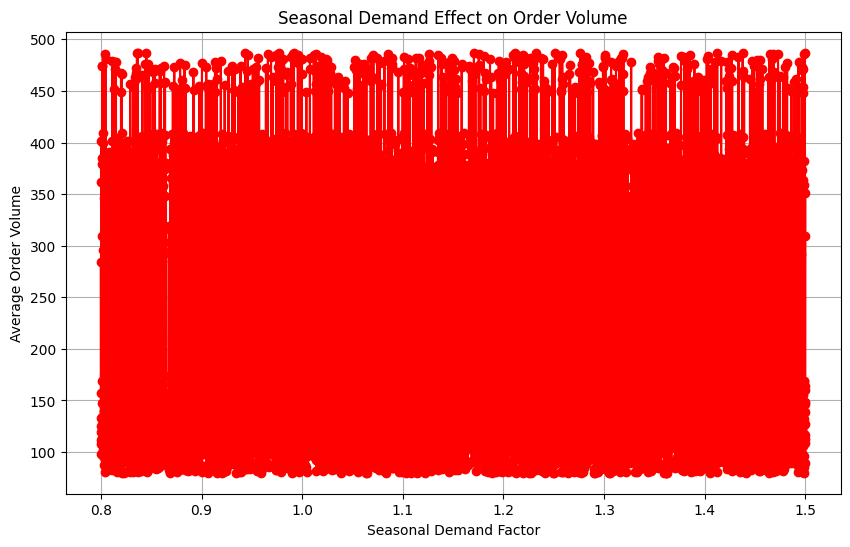

In [67]:
#Seasonal Demand Effect on Order Volume 
seasonal_demand_effect = product_data.groupby('Seasonal_Demand_Factor')['Order_Volume'].mean().reset_index()

# Plotting Seasonal Demand Effect 
plt.figure(figsize=(10,6))
plt.plot(seasonal_demand_effect['Seasonal_Demand_Factor'], seasonal_demand_effect['Order_Volume'], marker='o', color='r')
plt.title('Seasonal Demand Effect on Order Volume')
plt.xlabel('Seasonal Demand Factor')
plt.ylabel('Average Order Volume')
plt.grid(True)
plt.show()

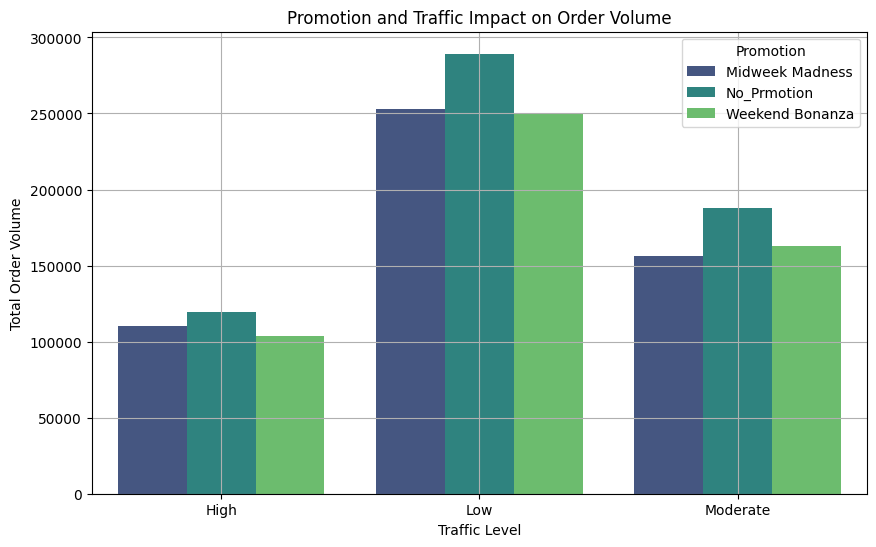

In [68]:
#Promotion and Traffic Interaction on Order Volume 
promotion_traffic_impact = product_data.groupby(['Promotion', 'Traffic'])['Order_Volume'].sum().reset_index()

# Plotting Promotion vs Traffic Impact 
plt.figure(figsize=(10,6))
sns.barplot(x='Traffic', y='Order_Volume', hue='Promotion', data=promotion_traffic_impact, palette='viridis')
plt.title('Promotion and Traffic Impact on Order Volume')
plt.xlabel('Traffic Level')
plt.ylabel('Total Order Volume')
plt.grid(True)
plt.show()

In [69]:
#  Order Volume by DateTime (Monthly Time Series)
datetime_order_volume = product_data.groupby('Date')['Order_Volume'].sum().reset_index()

# Plotting Order Volume over Time
fig = px.line(datetime_order_volume, x='Date', y='Order_Volume', title='Total Order Volume Over Time', 
              labels={'Order_Volume': 'Total Orders'})
fig.show()

In [70]:
#Order Volume by Week Number (Weekly Trend) using Plotly
product_data.loc[:,'Week_Number'] = product_data['DateTime'].dt.isocalendar().week
weekly_order_volume = product_data.groupby('Week_Number')['Order_Volume'].sum().reset_index()

# Plotting Weekly Order Volume with Plotly
fig = px.line(weekly_order_volume, x='Week_Number', y='Order_Volume', title='Total Order Volume by Week Number', 
              labels={'Order_Volume': 'Total Orders'})
fig.show()

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\827427679.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\2329331787.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x800 with 0 Axes>

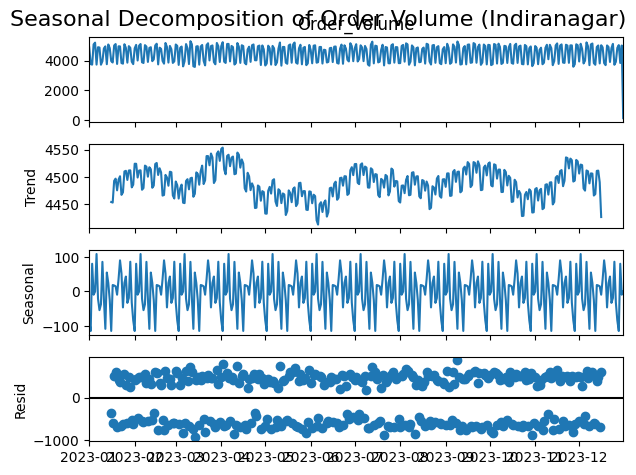

In [71]:
#Seasonal Decomposition (Trend, Seasonal, Residuals)
product_data['DateTime'] = pd.to_datetime(product_data['DateTime'])
product_data.set_index('DateTime', inplace=True)
daily_order_volume = product_data['Order_Volume'].resample('D').sum()
decomposition = seasonal_decompose(daily_order_volume, model='additive', period=30)
plt.figure(figsize=(10,8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Order Volume (Indiranagar)', fontsize=16)
plt.show()

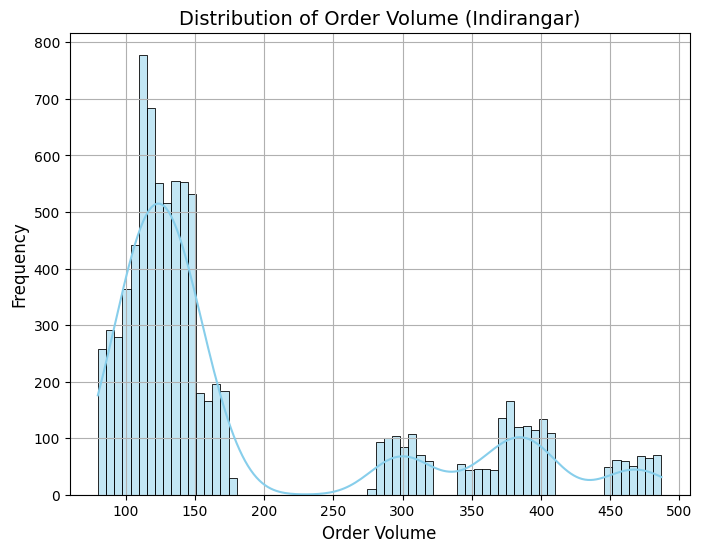

In [72]:
#Distribution of Order Volume 
plt.figure(figsize=(8,6))
sns.histplot(product_data['Order_Volume'], kde=True, color='skyblue')
plt.title('Distribution of Order Volume (Indirangar)', fontsize=14)
plt.xlabel('Order Volume', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

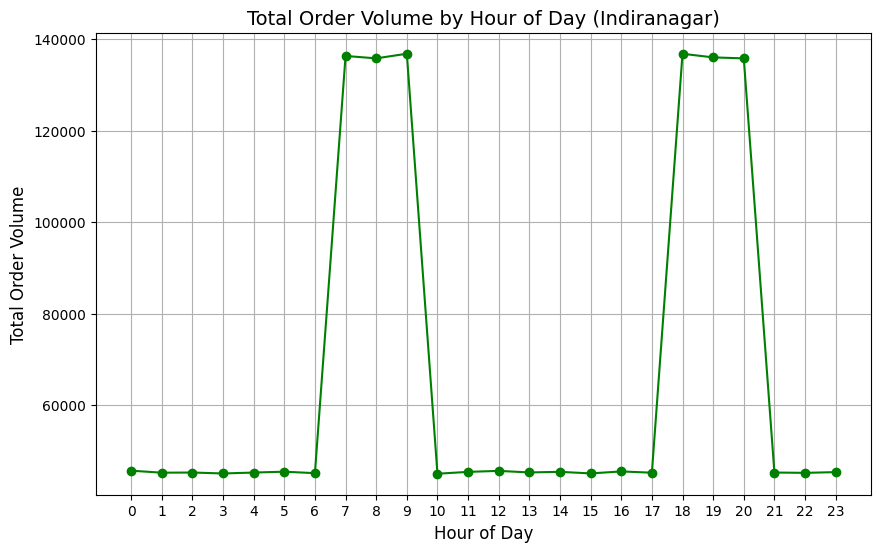

In [73]:
# Order Volume by Hour of the Day 
hourly_order_volume = product_data.groupby('Hour')['Order_Volume'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(hourly_order_volume['Hour'], hourly_order_volume['Order_Volume'], marker='o', color='green')
plt.title('Total Order Volume by Hour of Day (Indiranagar)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Order Volume', fontsize=12)
plt.grid(True)
plt.xticks(np.arange(0, 24, step=1))
plt.show()

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\868507706.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




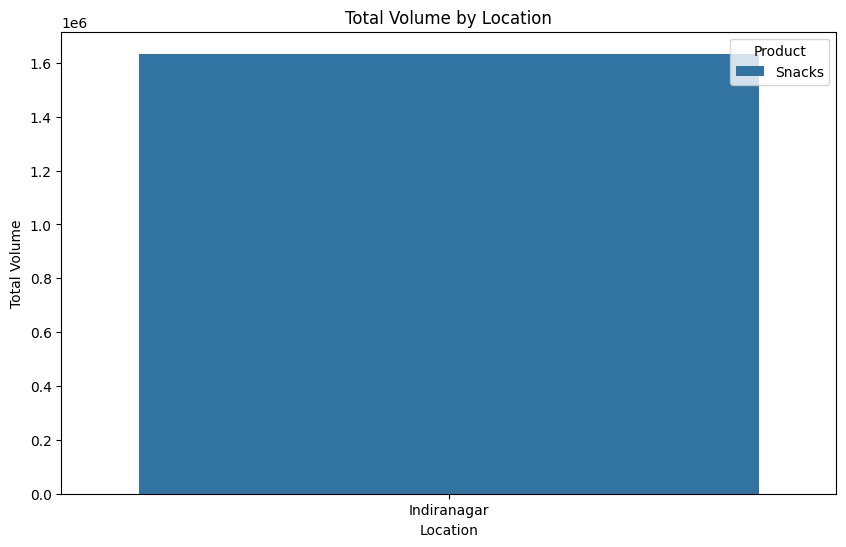

In [74]:
plt.figure(figsize=(10,6))
sns.barplot(x='Location', y='Order_Volume',hue='Product', data=product_data, estimator=sum, ci=None)
plt.title('Total Volume by Location')
plt.xlabel('Location')
plt.ylabel('Total Volume')
plt.xticks()
plt.show()

In [75]:
# Group by Minute and Location and calculate the sum of Volume
minute_location_group = product_data.groupby(['Minute', 'Location'])['Order_Volume'].sum().reset_index()
# Create the bar plot 
fig = px.bar(minute_location_group, x='Location', y='Order_Volume', color='Minute', 
             labels={'Minute': 'Minute', 'Order_Volume': 'Total Volume'},
             title='Volume by Minute and Location')
fig.update_xaxes(tickmode='array', tickvals=list(range(0, 60, 5)))
fig.show()

# Snack Order Analysis: Findings and Conclusion

## Findings

### 1. Monthly Snack Order Volume
- The **highest order volume** for snacks is in **July** (**139.447k**).
- The **lowest order volume** is in **February** (**126.248k**).

### 2. Hourly Snack Order Volume
- **Peak order times** are between **5 AM to 10 AM** and **5 PM to 8 PM**.

### 3. Per-Minute Snack Order Volume
- **Key Findings from Per-Minute Plot**:
  - The **sharpest spikes** in order volume occur at **7:45 AM** and **6:15 PM**, coinciding with breakfast and evening snack times.
  - **Steady order patterns** are observed between **8 AM - 10 AM** and **5 PM - 7 PM**, indicating consistent customer behavior.

### 4. Impact of Promotions
- **Midweek Madness** has the **highest average order volume**: **208.3868**.
- **Weekend Bonanza** results in an **average order volume** of **207.1061**.
- **No Promotion** leads to a **lower average order volume** of **159.4378**.

### 5. Seasonal Demand Effect
- There is a **strong positive relationship** between the **Seasonal Demand Factor** and the **average order volume**.

### 6. Traffic and Promotions
- **Low traffic** combined with **no promotion** generates the **highest total order volume**.

### 7. Daily and Weekly Trends
- The **highest daily order volume** was on **March 11, 2023**, with **5,304 orders**.
- **Week 26** recorded the **highest weekly total order volume**: **32.015k orders**.
- **Week 44** had the **lowest weekly order volume**: **30.627k orders**.

### 8. Seasonal Decomposition
- The **trend**, **seasonal patterns**, and **residual components** indicate a **consistent seasonal effect** on order volume in **Indiranagar**.

## Conclusion

1. **Peak Ordering Times**: Snack orders are highest at **7:45 AM** and **6:15 PM**, aligning with breakfast and evening snack times.
2. **Promotions**: **Midweek Madness** drives the highest average order volume (**208.3868**), outperforming other promotions.
3. **Traffic Conditions**: The **highest total order volume** occurs under **low traffic conditions** combined with **no promotions**, emphasizing the importance of seamless delivery during these times.
4. **Seasonal Influence**: Seasonal demand strongly impacts order volume, with **July** recording the highest orders.

<h1>Time Series Analysis for Snacks in 'Koramangala'</h1>

In [76]:
product_data=analysis_data[(analysis_data['Location']=='Koramangala') &
                           (analysis_data['Product']=='Snacks')]
product_data

,DateTime,Date,Hour,Day_of_Week,Location,Product,Order_Volume,Weather,Traffic,Is_Holiday,...,Distance_to_Warehouse,Customer_Age_Group,Feedback_Score,Item_Returned,Discount_Amount,Gift_Wrapping_Requested,Time_Since_Last_Order,Weather_Severity,Traffic_Congestion_Index,Warehouse_Proximity_Score
2,2023-01-01 00:00:00,2023-01-01,0,Sunday,Koramangala,Snacks,117,Clear,Moderate,0,...,2.583219,18-25,4.653989,True,7.524264,False,22.362036,1.471903,1.737306,6.862405
17,2023-01-01 01:00:00,2023-01-01,1,Sunday,Koramangala,Snacks,123,Cloudy,Low,0,...,15.089541,36-50,4.988170,False,49.861727,False,10.572128,0.599316,0.546052,7.264749
32,2023-01-01 02:00:00,2023-01-01,2,Sunday,Koramangala,Snacks,112,Clear,Moderate,0,...,3.952082,36-50,4.069511,False,94.993579,True,27.571209,1.410579,1.750439,8.407702
47,2023-01-01 03:00:00,2023-01-01,3,Sunday,Koramangala,Snacks,131,Clear,Low,0,...,8.463401,50+,3.214321,False,92.459448,True,26.660403,1.767468,1.643518,6.992449
62,2023-01-01 04:00:00,2023-01-01,4,Sunday,Koramangala,Snacks,116,Clear,High,0,...,18.072051,50+,4.427409,True,1.755396,True,23.168190,1.710388,1.554151,9.428350
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130982,2023-12-30 20:00:00,2023-12-30,20,Saturday,Koramangala,Snacks,405,Clear,Low,0,...,7.509013,18-25,4.480802,True,68.193941,True,16.867842,1.642378,1.868856,1.988849
130997,2023-12-30 21:00:00,2023-12-30,21,Saturday,Koramangala,Snacks,168,Rainy,Low,0,...,3.986743,50+,3.644014,False,64.582979,True,15.910838,1.675199,1.836463,3.706832
131012,2023-12-30 22:00:00,2023-12-30,22,Saturday,Koramangala,Snacks,162,Rainy,Low,0,...,15.485011,18-25,4.790133,True,35.388526,False,5.037228,1.058069,1.574772,6.992722
131027,2023-12-30 23:00:00,2023-12-30,23,Saturday,Koramangala,Snacks,121,Cloudy,Low,0,...,19.943443,26-35,4.321363,False,66.874774,True,26.654596,1.542635,1.910317,1.460149


In [77]:
# Displaying the information about the dataset, including the number of non-null entries and the data types of each column
product_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8737 entries, 2 to 131042
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DateTime                     8737 non-null   object 
 1   Date                         8737 non-null   object 
 2   Hour                         8737 non-null   int64  
 3   Day_of_Week                  8737 non-null   object 
 4   Location                     8737 non-null   object 
 5   Product                      8737 non-null   object 
 6   Order_Volume                 8737 non-null   int64  
 7   Weather                      8737 non-null   object 
 8   Traffic                      8737 non-null   object 
 9   Is_Holiday                   8737 non-null   int64  
 10  Promotion                    8737 non-null   object 
 11  Customer_Rating              8737 non-null   float64
 12  Distance_to_Customer         8737 non-null   float64
 13  Warehouse_Stock_Level

In [78]:
product_data.loc[:,'Promotion'].unique()

array(['Weekend Bonanza', 'No_Prmotion', 'Midweek Madness'], dtype=object)

In [79]:
# Checking for missing (null) values in each column and displaying the total count of null values per column
product_data.isnull().sum()

DateTime                       0
Date                           0
Hour                           0
Day_of_Week                    0
Location                       0
Product                        0
Order_Volume                   0
Weather                        0
Traffic                        0
Is_Holiday                     0
Promotion                      0
Customer_Rating                0
Distance_to_Customer           0
Warehouse_Stock_Level          0
Average_Preparation_Time       0
Delivery_Staff_Availability    0
Temperature                    0
Humidity                       0
Air_Quality_Index              0
Vehicle_Type                   0
Order_Priority                 0
Coupon_Used                    0
Previous_Order_Cancellation    0
Delivery_Speed                 0
Staff_Experience_Level         0
Fuel_Cost                      0
Packaging_Cost                 0
Customer_Loyalty_Points        0
Nearby_Competitors             0
Seasonal_Demand_Factor         0
Payment_Ty

In [80]:
#  Basic Statistical Analysis (Mean, Median, etc.)
mean_order_volume =product_data['Order_Volume'].mean()
median_order_volume = product_data['Order_Volume'].median()
std_order_volume = product_data['Order_Volume'].std()
max_order_volume = product_data['Order_Volume'].max()
min_order_volume = product_data['Order_Volume'].min()

print(f"Mean Order Volume: {mean_order_volume}")
print(f"Median Order Volume: {median_order_volume}")
print(f"Standard Deviation of Order Volume: {std_order_volume}")
print(f"Maximum Order Volume: {max_order_volume}")
print(f"Minimum Order Volume: {min_order_volume}")

Mean Order Volume: 187.02586700240357
Median Order Volume: 136.0
Standard Deviation of Order Volume: 113.91366087093944
Maximum Order Volume: 487
Minimum Order Volume: 80


In [81]:
# Assuming product_data is your dataframe and 'DateTime' column is in string format
product_data['DateTime'] = pd.to_datetime(product_data['DateTime'], errors='coerce')
product_data.loc[:,'Weekr'] = product_data['DateTime'].dt.isocalendar().week
product_data.loc[:,'Month'] = product_data['DateTime'].dt.month_name()
product_data.loc[:,'Season'] = (product_data['DateTime'].dt.month % 12 // 3 + 1).map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
product_data.loc[:,'Minute'] = product_data['DateTime'].dt.minute  

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\2273184849.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\2273184849.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\2273184849.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [82]:
# Monthly Order Volume Analysis
monthly_order_volume = product_data.groupby(['Month','Location'])['Order_Volume'].sum().reset_index()
# Plotting Monthly Order Volume
fig = px.bar(monthly_order_volume, x='Month', y='Order_Volume',color='Location', title='Monthly Order Volume', 
             labels={'Order_Volume': 'Total Orders'})
fig.show()

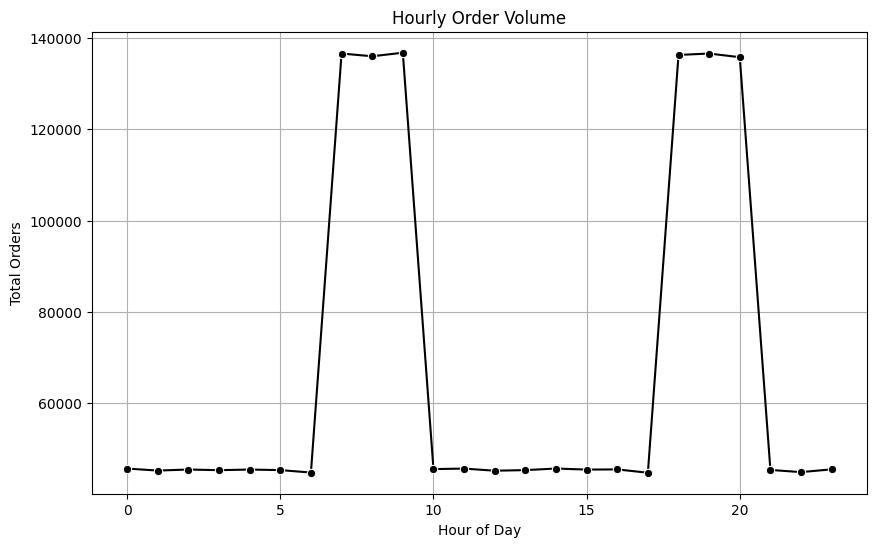

In [83]:
# Hourly Order Volume Analysis using Seaborn
hourly_order_volume = product_data.groupby('Hour')['Order_Volume'].sum().reset_index()
# Plotting Hourly Order Volume 
plt.figure(figsize=(10,6))
sns.lineplot(x='Hour', y='Order_Volume', data=hourly_order_volume, marker='o', color='black')
plt.title('Hourly Order Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()

In [84]:
#Promotion Impact Analysis 
promotion_impact = product_data.groupby(['Promotion','Location'])['Order_Volume'].mean().reset_index()

# Plotting Promotion Impact 
fig = px.bar(promotion_impact, x='Promotion', y='Order_Volume',color='Location', title='Effect of Promotions on Orders', 
             labels={'Promotion': 'Promotion (0: No, 1: Yes)', 'Order_Volume': 'Average Order Volume'})
fig.show()

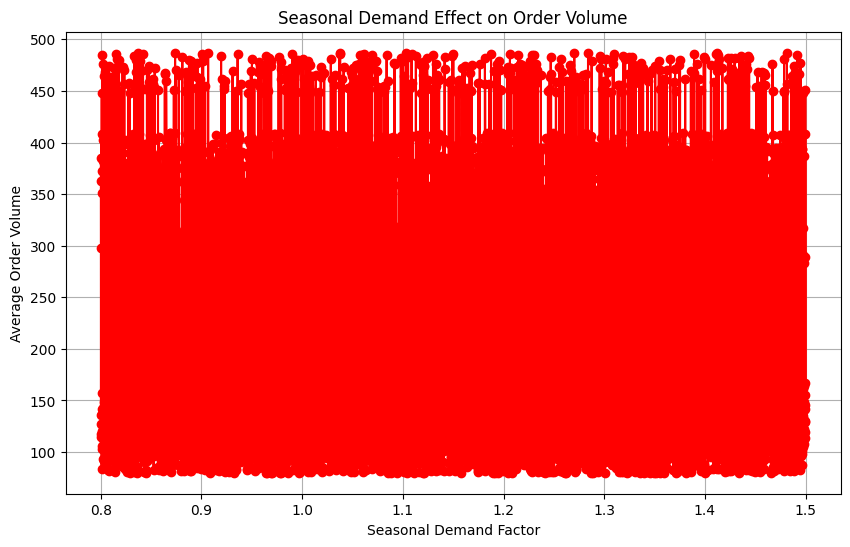

In [85]:
#Seasonal Demand Effect on Order Volume 
seasonal_demand_effect = product_data.groupby('Seasonal_Demand_Factor')['Order_Volume'].mean().reset_index()

# Plotting Seasonal Demand Effect 
plt.figure(figsize=(10,6))
plt.plot(seasonal_demand_effect['Seasonal_Demand_Factor'], seasonal_demand_effect['Order_Volume'], marker='o', color='r')
plt.title('Seasonal Demand Effect on Order Volume')
plt.xlabel('Seasonal Demand Factor')
plt.ylabel('Average Order Volume')
plt.grid(True)
plt.show()

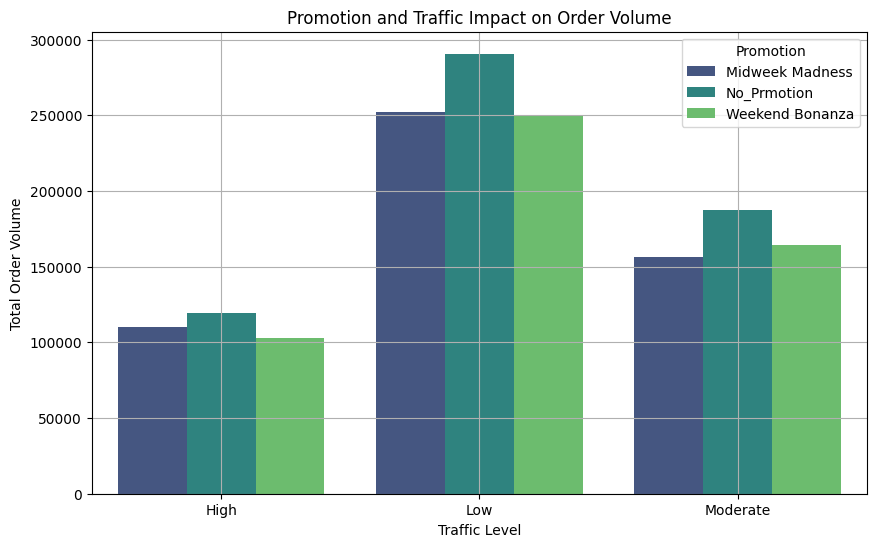

In [86]:
#Promotion and Traffic Interaction on Order Volume 
promotion_traffic_impact = product_data.groupby(['Promotion', 'Traffic'])['Order_Volume'].sum().reset_index()

# Plotting Promotion vs Traffic Impact 
plt.figure(figsize=(10,6))
sns.barplot(x='Traffic', y='Order_Volume', hue='Promotion', data=promotion_traffic_impact, palette='viridis')
plt.title('Promotion and Traffic Impact on Order Volume')
plt.xlabel('Traffic Level')
plt.ylabel('Total Order Volume')
plt.grid(True)
plt.show()

In [87]:
#Order Volume by DateTime (Monthly Time Series)
datetime_order_volume = product_data.groupby(['Date','Product'])['Order_Volume'].sum().reset_index()

# Plotting Order Volume over Time
fig = px.line(datetime_order_volume, x='Date', y='Order_Volume',color='Product', title='Total Order Volume Over Time', 
              labels={'Order_Volume': 'Total Orders'})
fig.show()

In [88]:
#Order Volume by Week Number (Weekly Trend) 
product_data.loc[:,'Week_Number'] = product_data['DateTime'].dt.isocalendar().week
weekly_order_volume = product_data.groupby(['Week_Number','Location'])['Order_Volume'].sum().reset_index()

# Plotting Weekly Order Volume
fig = px.line(weekly_order_volume, x='Week_Number', y='Order_Volume',color='Location', title='Total Order Volume by Week Number', 
              labels={'Order_Volume': 'Total Orders'})
fig.show()

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\1025245418.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\350210261.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x800 with 0 Axes>

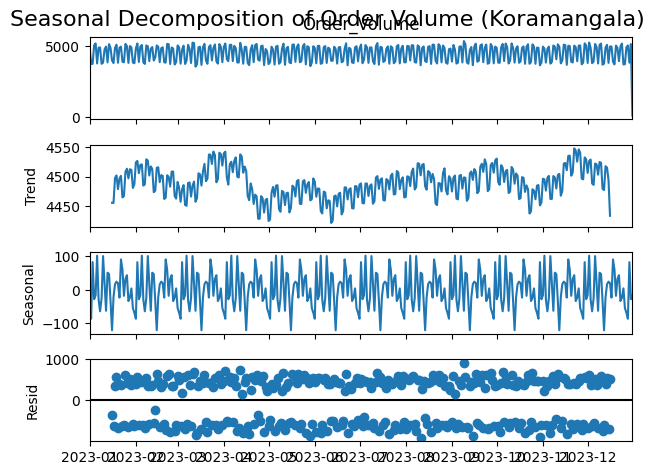

In [89]:
#  Seasonal Decomposition (Trend, Seasonal, Residuals)
product_data['DateTime'] = pd.to_datetime(product_data['DateTime'])
product_data.set_index('DateTime', inplace=True)
daily_order_volume = product_data['Order_Volume'].resample('D').sum()
decomposition = seasonal_decompose(daily_order_volume, model='additive', period=30)
plt.figure(figsize=(10,8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Order Volume (Koramangala)', fontsize=16)
plt.show()

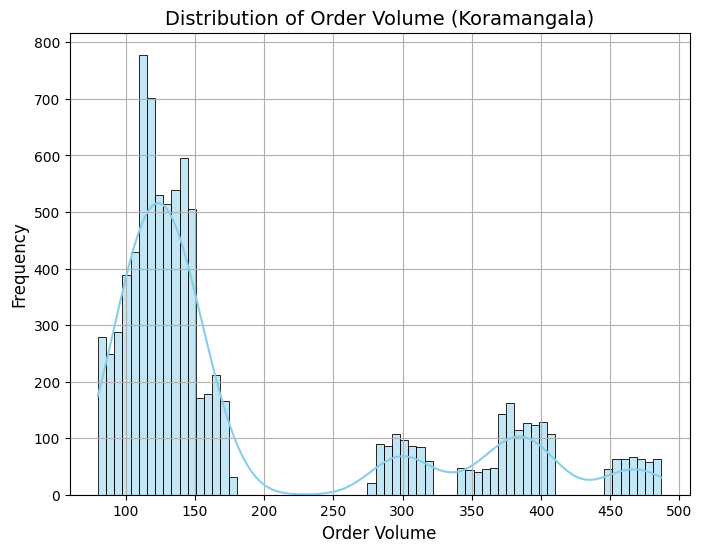

In [90]:
#Distribution of Order Volume 
plt.figure(figsize=(8,6))
sns.histplot(product_data['Order_Volume'], kde=True, color='skyblue')
plt.title('Distribution of Order Volume (Koramangala)', fontsize=14)
plt.xlabel('Order Volume', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

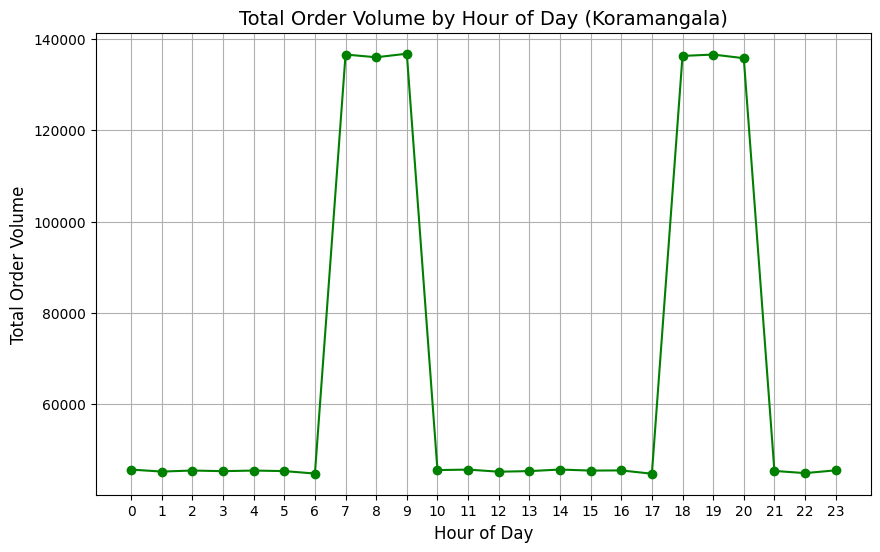

In [91]:
# Order Volume by Hour of the Day 
hourly_order_volume = product_data.groupby('Hour')['Order_Volume'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(hourly_order_volume['Hour'], hourly_order_volume['Order_Volume'], marker='o', color='green')
plt.title('Total Order Volume by Hour of Day (Koramangala)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Order Volume', fontsize=12)
plt.grid(True)
plt.xticks(np.arange(0, 24, step=1))
plt.show()

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\868507706.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




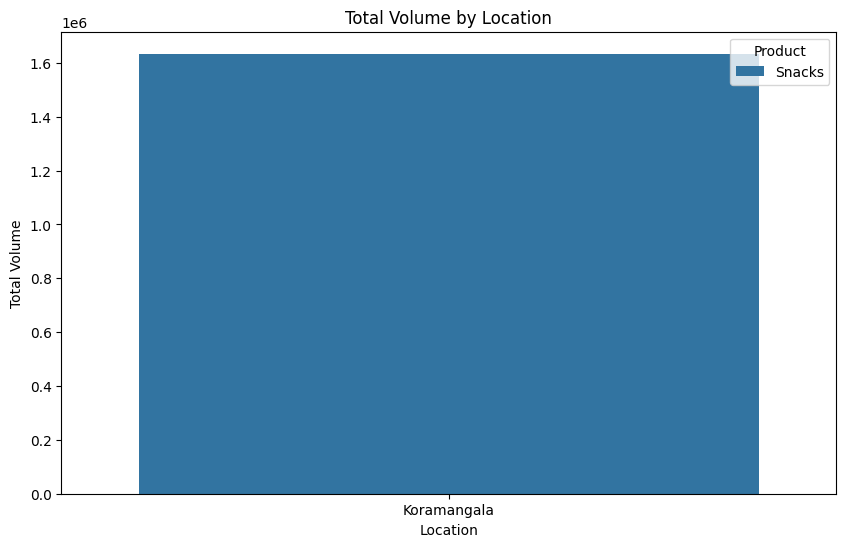

In [92]:
plt.figure(figsize=(10,6))
sns.barplot(x='Location', y='Order_Volume',hue='Product', data=product_data, estimator=sum, ci=None)
plt.title('Total Volume by Location')
plt.xlabel('Location')
plt.ylabel('Total Volume')
plt.xticks()
plt.show()

In [93]:
# Group by Minute and Location and calculate the sum of Volume
minute_location_group = product_data.groupby(['Minute', 'Location'])['Order_Volume'].sum().reset_index()
# Create the bar plot 
fig = px.bar(minute_location_group, x='Location', y='Order_Volume', color='Minute', 
             labels={'Minute': 'Minute', 'Order_Volume': 'Total Volume'},
             title='Volume by Minute and Location')
fig.update_xaxes(tickmode='array', tickvals=list(range(0, 60, 5)))
fig.show()

## Findings from Time Series Analysis on Snacks in Koramangala

### 1. **Mean Order Volume**
   - The average order volume for snacks in Koramangala is **187.03** orders.

### 2. **Median Order Volume**
   - The median order volume is **136** orders, indicating a skew towards lower order volumes compared to the mean.

### 3. **Order Volume Distribution**
   - The order volume shows considerable variation with a standard deviation of **113.91**.
   - The maximum order volume is **487** orders, while the minimum order volume is **80** orders.

### 4. **Monthly Order Volume**
   - **August** has the highest order volume at **139.615K** orders.
   - **February** has the lowest order volume at **126.05K** orders.
   - **March** follows closely as the second-highest with **139.567K** orders.

### 5. **Hourly Order Volume**
   - Peak order volumes are observed between **5 AM to 10 AM**, with a slight dip at **8 AM**.
   - Another peak occurs from **5 PM to 9 PM**, with a slight increase during this period.

### 6. **Promotion Impact**
   - **Midweek Madness** promotion resulted in the highest average order volume (**207.95 orders**).
   - **No Promotion** had the lowest average order volume (**159.62 orders**).
   - **Weekend Bonanza** showed an average of **207.14 orders**, slightly lower than Midweek Madness.

### 7. **Seasonal Demand Effect**
   - Seasonal demand factors show no major impact on order volume. Orders tend to stay consistent across seasons, regardless of promotion or traffic.

### 8. **Order Volume by DateTime (Time Series)**
   - The highest order volume for snacks occurred on **9th September 2023**, with **5348 orders**.
   - The lowest order volume occurred on **13th March 2023**, with **3553 orders**.

### 9. **Weekly Order Volume**
   - The lowest order volume was recorded in **Week 44** at **30.858K orders**.
   - The highest order volume was recorded in **Week 14** at **31.958K orders**.

### 10. **Seasonal Decomposition of Order Volume**
   - The seasonal decomposition of order volume reveals a periodic trend, with consistent seasonal fluctuations in demand across days, weeks, and months.

### 11. **Distribution of Order Volume**
   - The distribution of order volume follows a right-skewed pattern, with most of the orders clustered around lower values.

### 12. **Order Volume by Hour of the Day**
   - The hourly order volume graph shows clear peaks during early morning (5 AM - 10 AM) and late evening (5 PM - 9 PM), highlighting the demand patterns throughout the day.

---

## Conclusion

The time series analysis of snack orders in Koramangala reveals several important insights:

- **Demand Peaks**: Order volumes show clear peaks in the morning (5 AM - 10 AM) and evening (5 PM - 9 PM), highlighting key periods of high demand.
- **Impact of Promotions**: Promotional campaigns, especially "Midweek Madness," significantly boost order volumes, with no promotion leading to the lowest order volumes.
- **Seasonal Trends**: While there is a periodic trend in the data, seasonal factors don't have a major impact on overall order volume, suggesting more consistent demand throughout the year.
- **Order Variability**: The order volume shows substantial variation, with some weeks and months experiencing higher orders than others. The distribution is right-skewed, indicating that most orders are concentrated in the lower range.

<h1>Time Series Analysis for Snacks in "WhiteField"</h1>

In [101]:
product_data = analysis_data[
    (analysis_data['Location'] == 'Whitefield') & 
    (analysis_data['Product'] == 'Snacks')
]
product_data

,DateTime,Date,Hour,Day_of_Week,Location,Product,Order_Volume,Weather,Traffic,Is_Holiday,...,Distance_to_Warehouse,Customer_Age_Group,Feedback_Score,Item_Returned,Discount_Amount,Gift_Wrapping_Requested,Time_Since_Last_Order,Weather_Severity,Traffic_Congestion_Index,Warehouse_Proximity_Score
7,2023-01-01 00:00:00,2023-01-01,0,Sunday,Whitefield,Snacks,124,Clear,Moderate,0,...,10.472667,36-50,3.236114,False,3.433091,False,18.591919,0.859546,0.618257,6.202469
22,2023-01-01 01:00:00,2023-01-01,1,Sunday,Whitefield,Snacks,116,Cloudy,Low,0,...,17.163815,36-50,4.299786,False,60.399915,False,26.203389,1.589856,0.802298,5.097287
37,2023-01-01 02:00:00,2023-01-01,2,Sunday,Whitefield,Snacks,138,Clear,Moderate,0,...,2.587217,26-35,4.221214,True,5.448761,False,6.209332,1.721619,0.632692,4.036627
52,2023-01-01 03:00:00,2023-01-01,3,Sunday,Whitefield,Snacks,118,Clear,Low,0,...,3.045880,26-35,3.426770,False,56.380912,True,29.087862,0.901516,1.803324,7.376647
67,2023-01-01 04:00:00,2023-01-01,4,Sunday,Whitefield,Snacks,129,Clear,High,0,...,15.530427,26-35,3.934025,False,94.910102,False,29.252193,1.150042,1.589252,8.092478
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130987,2023-12-30 20:00:00,2023-12-30,20,Saturday,Whitefield,Snacks,397,Clear,Low,0,...,17.803346,18-25,4.645276,False,31.689124,True,24.064819,1.461772,1.215004,7.132416
131002,2023-12-30 21:00:00,2023-12-30,21,Saturday,Whitefield,Snacks,156,Rainy,Low,0,...,8.823725,26-35,4.267490,True,42.786226,False,11.606391,1.753401,1.037840,7.731978
131017,2023-12-30 22:00:00,2023-12-30,22,Saturday,Whitefield,Snacks,151,Rainy,Low,0,...,18.990706,36-50,4.282429,False,20.297817,True,18.057110,1.854292,0.691305,2.356792
131032,2023-12-30 23:00:00,2023-12-30,23,Saturday,Whitefield,Snacks,141,Cloudy,Low,0,...,8.966918,18-25,4.186956,False,32.132560,False,1.345962,1.658896,1.716858,5.743145


In [102]:
# Displaying the information about the dataset, including the number of non-null entries and the data types of each column
product_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8737 entries, 7 to 131047
Data columns (total 43 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   DateTime                     8737 non-null   object 
 1   Date                         8737 non-null   object 
 2   Hour                         8737 non-null   int64  
 3   Day_of_Week                  8737 non-null   object 
 4   Location                     8737 non-null   object 
 5   Product                      8737 non-null   object 
 6   Order_Volume                 8737 non-null   int64  
 7   Weather                      8737 non-null   object 
 8   Traffic                      8737 non-null   object 
 9   Is_Holiday                   8737 non-null   int64  
 10  Promotion                    8737 non-null   object 
 11  Customer_Rating              8737 non-null   float64
 12  Distance_to_Customer         8737 non-null   float64
 13  Warehouse_Stock_Level

In [103]:
product_data.loc[:,'Promotion'].unique()

array(['Weekend Bonanza', 'No_Prmotion', 'Midweek Madness'], dtype=object)

In [104]:
# Checking for missing (null) values in each column and displaying the total count of null values per column
product_data.isnull().sum()

DateTime                       0
Date                           0
Hour                           0
Day_of_Week                    0
Location                       0
Product                        0
Order_Volume                   0
Weather                        0
Traffic                        0
Is_Holiday                     0
Promotion                      0
Customer_Rating                0
Distance_to_Customer           0
Warehouse_Stock_Level          0
Average_Preparation_Time       0
Delivery_Staff_Availability    0
Temperature                    0
Humidity                       0
Air_Quality_Index              0
Vehicle_Type                   0
Order_Priority                 0
Coupon_Used                    0
Previous_Order_Cancellation    0
Delivery_Speed                 0
Staff_Experience_Level         0
Fuel_Cost                      0
Packaging_Cost                 0
Customer_Loyalty_Points        0
Nearby_Competitors             0
Seasonal_Demand_Factor         0
Payment_Ty

In [105]:
#  Basic Statistical Analysis (Mean, Median, etc.)
mean_order_volume =product_data['Order_Volume'].mean()
median_order_volume = product_data['Order_Volume'].median()
std_order_volume = product_data['Order_Volume'].std()
max_order_volume = product_data['Order_Volume'].max()
min_order_volume = product_data['Order_Volume'].min()

print(f"Mean Order Volume: {mean_order_volume}")
print(f"Median Order Volume: {median_order_volume}")
print(f"Standard Deviation of Order Volume: {std_order_volume}")
print(f"Maximum Order Volume: {max_order_volume}")
print(f"Minimum Order Volume: {min_order_volume}")

Mean Order Volume: 186.88726107359506
Median Order Volume: 136.0
Standard Deviation of Order Volume: 113.74546037723124
Maximum Order Volume: 487
Minimum Order Volume: 80


In [107]:
# Assuming product_data is your dataframe and 'DateTime' column is in string format
product_data['DateTime'] = pd.to_datetime(product_data['DateTime'], errors='coerce')
product_data.loc[:,'Weekr'] = product_data['DateTime'].dt.isocalendar().week
product_data.loc[:,'Month'] = product_data['DateTime'].dt.month_name()
product_data.loc[:,'Season'] = (product_data['DateTime'].dt.month % 12 // 3 + 1).map({1: 'Winter', 2: 'Spring', 3: 'Summer', 4: 'Fall'})
product_data.loc[:,'Minute'] = product_data['DateTime'].dt.minute  

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\2273184849.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [108]:
# Monthly Order Volume Analysis
monthly_order_volume = product_data.groupby(['Month','Location'])['Order_Volume'].sum().reset_index()
# Plotting Monthly Order Volume
fig = px.bar(monthly_order_volume, x='Month', y='Order_Volume',color='Location', title='Monthly Order Volume', 
             labels={'Order_Volume': 'Total Orders'})
fig.show()


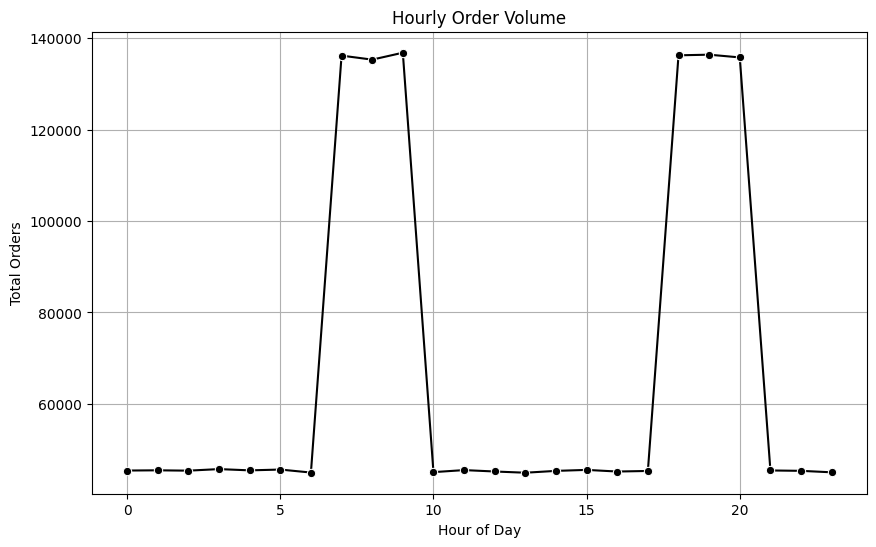

In [109]:
# Hourly Order Volume Analysis using Seaborn
hourly_order_volume = product_data.groupby('Hour')['Order_Volume'].sum().reset_index()
# Plotting Hourly Order Volume 
plt.figure(figsize=(10,6))
sns.lineplot(x='Hour', y='Order_Volume', data=hourly_order_volume, marker='o', color='black')
plt.title('Hourly Order Volume')
plt.xlabel('Hour of Day')
plt.ylabel('Total Orders')
plt.grid(True)
plt.show()

In [110]:
#Promotion Impact Analysis 
promotion_impact = product_data.groupby(['Promotion','Location'])['Order_Volume'].mean().reset_index()

# Plotting Promotion Impact 
fig = px.bar(promotion_impact, x='Promotion', y='Order_Volume',color='Location', title='Effect of Promotions on Orders', 
             labels={'Promotion': 'Promotion (0: No, 1: Yes)', 'Order_Volume': 'Average Order Volume'})
fig.show()

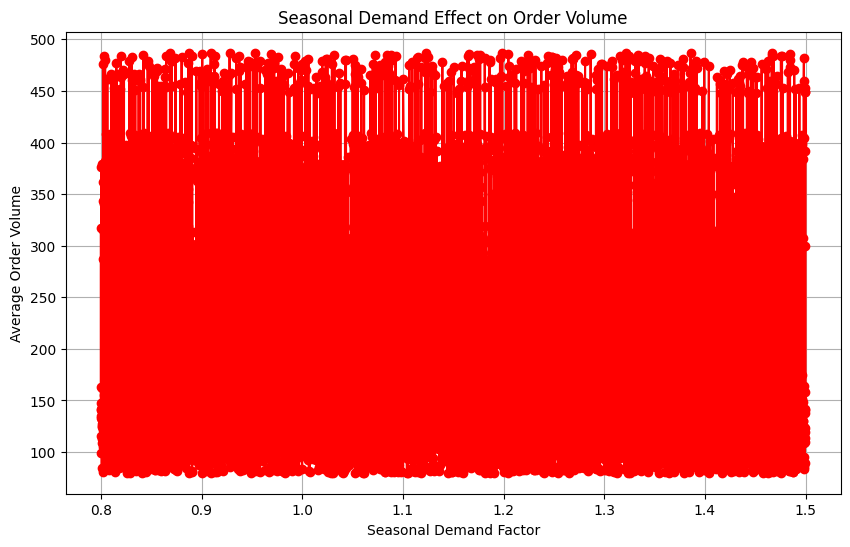

In [111]:
#Seasonal Demand Effect on Order Volume 
seasonal_demand_effect = product_data.groupby('Seasonal_Demand_Factor')['Order_Volume'].mean().reset_index()

# Plotting Seasonal Demand Effect 
plt.figure(figsize=(10,6))
plt.plot(seasonal_demand_effect['Seasonal_Demand_Factor'], seasonal_demand_effect['Order_Volume'], marker='o', color='r')
plt.title('Seasonal Demand Effect on Order Volume')
plt.xlabel('Seasonal Demand Factor')
plt.ylabel('Average Order Volume')
plt.grid(True)
plt.show()

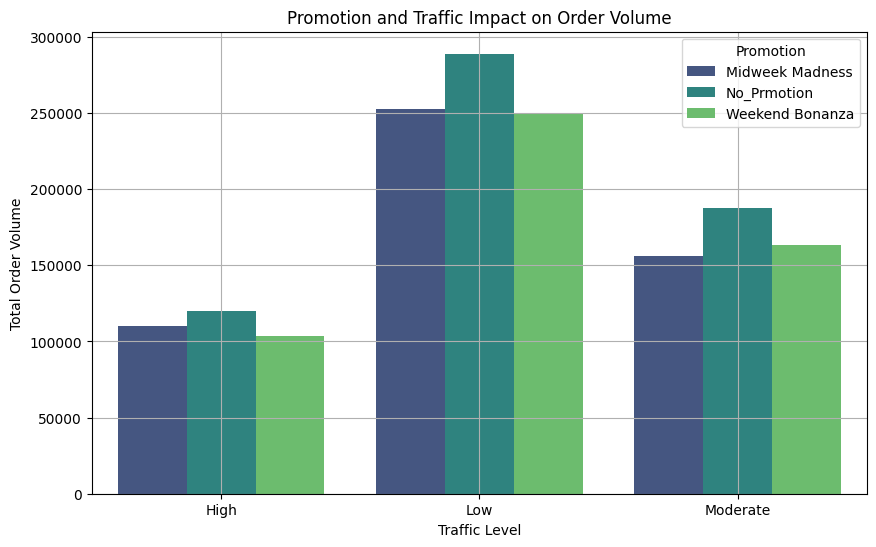

In [112]:
#Promotion and Traffic Interaction on Order Volume 
promotion_traffic_impact = product_data.groupby(['Promotion', 'Traffic'])['Order_Volume'].sum().reset_index()

# Plotting Promotion vs Traffic Impact 
plt.figure(figsize=(10,6))
sns.barplot(x='Traffic', y='Order_Volume', hue='Promotion', data=promotion_traffic_impact, palette='viridis')
plt.title('Promotion and Traffic Impact on Order Volume')
plt.xlabel('Traffic Level')
plt.ylabel('Total Order Volume')
plt.grid(True)
plt.show()

In [113]:
#Order Volume by DateTime (Monthly Time Series)
datetime_order_volume = product_data.groupby(['Date','Product'])['Order_Volume'].sum().reset_index()

# Plotting Order Volume over Time
fig = px.line(datetime_order_volume, x='Date', y='Order_Volume',color='Product', title='Total Order Volume Over Time', 
              labels={'Order_Volume': 'Total Orders'})
fig.show()

In [114]:
#Order Volume by Week Number (Weekly Trend) 
product_data.loc[:,'Week_Number'] = product_data['DateTime'].dt.isocalendar().week
weekly_order_volume = product_data.groupby(['Week_Number','Location'])['Order_Volume'].sum().reset_index()

# Plotting Weekly Order Volume
fig = px.line(weekly_order_volume, x='Week_Number', y='Order_Volume',color='Location', title='Total Order Volume by Week Number', 
              labels={'Order_Volume': 'Total Orders'})
fig.show()

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\1025245418.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\3251144207.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



<Figure size 1000x800 with 0 Axes>

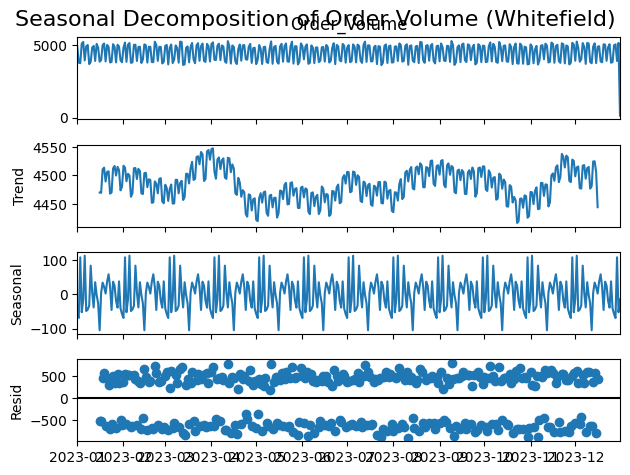

In [115]:
#  Seasonal Decomposition (Trend, Seasonal, Residuals)
product_data['DateTime'] = pd.to_datetime(product_data['DateTime'])
product_data.set_index('DateTime', inplace=True)
daily_order_volume = product_data['Order_Volume'].resample('D').sum()
decomposition = seasonal_decompose(daily_order_volume, model='additive', period=30)
plt.figure(figsize=(10,8))
decomposition.plot()
plt.suptitle('Seasonal Decomposition of Order Volume (Whitefield)', fontsize=16)
plt.show()

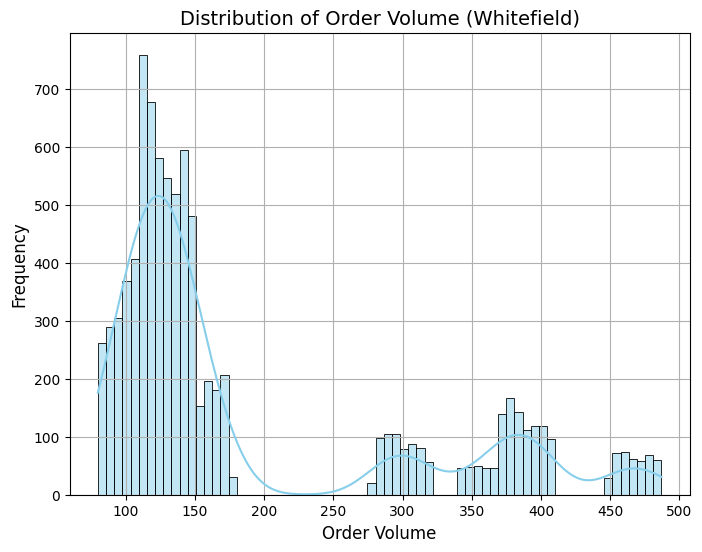

In [116]:
#Distribution of Order Volume 
plt.figure(figsize=(8,6))
sns.histplot(product_data['Order_Volume'], kde=True, color='skyblue')
plt.title('Distribution of Order Volume (Whitefield)', fontsize=14)
plt.xlabel('Order Volume', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.grid(True)
plt.show()

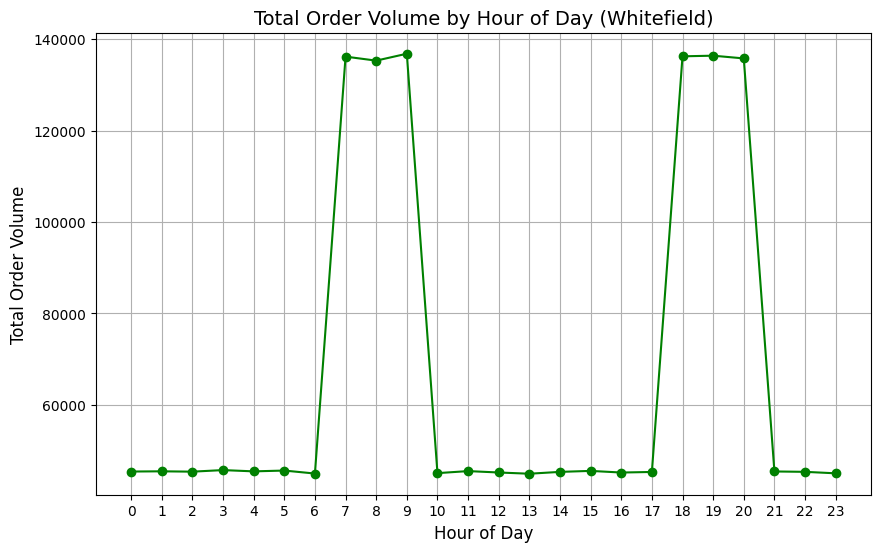

In [117]:
# Order Volume by Hour of the Day 
hourly_order_volume = product_data.groupby('Hour')['Order_Volume'].sum().reset_index()
plt.figure(figsize=(10,6))
plt.plot(hourly_order_volume['Hour'], hourly_order_volume['Order_Volume'], marker='o', color='green')
plt.title('Total Order Volume by Hour of Day (Whitefield)', fontsize=14)
plt.xlabel('Hour of Day', fontsize=12)
plt.ylabel('Total Order Volume', fontsize=12)
plt.grid(True)
plt.xticks(np.arange(0, 24, step=1))
plt.show()

C:\Users\vs390\AppData\Local\Temp\ipykernel_5492\868507706.py:2: FutureWarning:



The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.




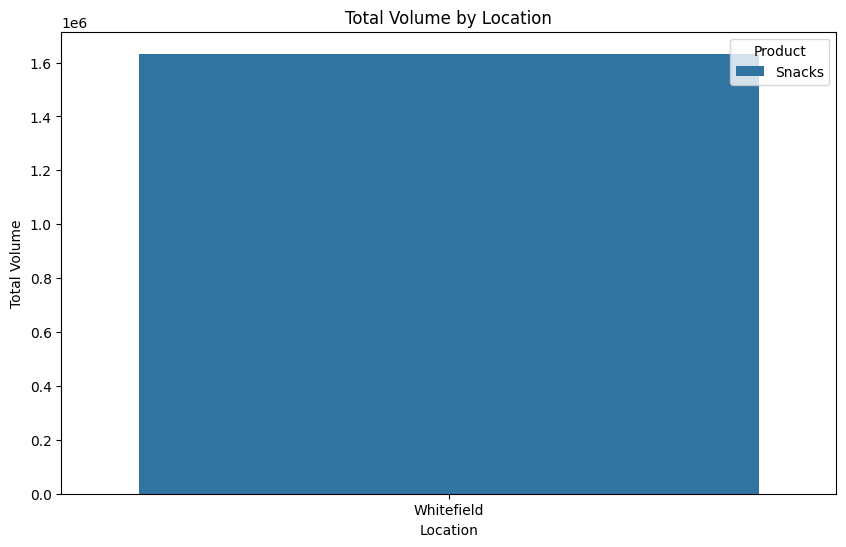

In [118]:
plt.figure(figsize=(10,6))
sns.barplot(x='Location', y='Order_Volume',hue='Product', data=product_data, estimator=sum, ci=None)
plt.title('Total Volume by Location')
plt.xlabel('Location')
plt.ylabel('Total Volume')
plt.xticks()
plt.show()

In [127]:
# Group by Minute and Location and calculate the sum of Volume
minute_location_group = product_data.groupby(['Minute', 'Location'])['Order_Volume'].sum().reset_index()
# Create the bar plot 
fig = px.bar(minute_location_group, x='Location', y='Order_Volume', color='Minute', 
             labels={'Minute': 'Minute', 'Order_Volume': 'Total Volume'},
             title='Volume by Minute and Location')
fig.update_xaxes(tickmode='array', tickvals=list(range(0, 60, 5)))
fig.show()

In [129]:
# Group the data by location and get the size (order volume count)
location_product_volume = product_data.groupby('Location')['Order_Volume'].size().reset_index(name='Order_Volume')

# Creating the plot
fig = px.bar(location_product_volume, x='Location', y='Order_Volume', 
             title='Order Volume by Location', 
             labels={'Location': 'Location', 'Order_Volume': 'Order Volume'},
             color='Location', 
             color_continuous_scale='Viridis',
             text='Order_Volume')
fig.update_traces(texttemplate='%{text}', textposition='outside', marker_line_width=2, marker_line_color='black')
fig.update_layout(
    title='Order Volume by Location',
    title_font=dict(size=24, family='Arial, sans-serif', color='darkblue'),
    xaxis_title='Location',
    yaxis_title='Order Volume',
    xaxis=dict(tickmode='linear', tickangle=45),
    yaxis=dict(showgrid=True, zeroline=True),
    plot_bgcolor='lightgrey',
    showlegend=False
)

fig.show()


### Order Volume by Location

The chart shows the distribution of order volumes across different locations, with **Whitefield** having the highest order volume of **8,737**. The **maximum order volume** recorded for Whitefield is **487**, and the **minimum order volume** recorded is **80**.



# Order Volume Analysis for Snack Product in Whitefield

### 1. **Basic Statistical Analysis**:
   - **Mean Order Volume**: 186.89.
   - **Median Order Volume**: 136.
   - **Standard Deviation**: 113.75.
   - **Max Order Volume**: 487.
   - **Min Order Volume**: 80.

### 2. **Monthly Order Volume Analysis**:
   - **August** had the highest total order volume at **139.778k**.
   - **March** follows with a close total of **139.474k**.
   - **February** had the lowest order volume at **125.756k**.

### 3. **Hourly Order Volume Analysis**:
   - Order volume increases from **6 AM to 10 AM**, with a slight dip at **8 AM**, followed by an increase at **10 AM**.
   - A significant increase in order volume is observed between **5 PM to 9 PM**, with a peak at **5 PM**. At **9 PM**, there is a slight drop in volume.

   **Detailed Hourly Volume Trend**:
   - **6-10 AM**: The order volume steadily increases, with **8 AM** showing a slight dip and **10 AM** showing a slight increase.
   - **5-9 PM**: A noticeable peak in order volume occurs at **5 PM**, and there is a slight drop in volume at **9 PM**.

### 4. **Promotion Impact on Order Volume**:
   - **Midweek Madness** promotion had an average order volume of **208.0565**.
   - **Weekend Bonanza** came in second with an average of **207.0316**.
   - **No Promotion** resulted in an average order volume of **159.3395**.
   - Promotions significantly impact order volume, with **Midweek Madness** generating the most orders.

### 5. **Seasonal Demand Effect on Order Volume**:
   - **Summer (April)** sees higher order volumes due to increased demand in the season.
   - Seasonal demand patterns significantly influence order volumes, especially in warmer months when people tend to engage more in online shopping.

### 6. **Promotion and Traffic Interaction on Order Volume**:
   - **Low Traffic**: The highest order volume is observed with **No Promotion**, followed by **Midweek Madness**, and the least with **Weekend Bonanza**.
   - **Moderate Traffic**: Orders are highest with **No Promotion**, followed by **Weekend Bonanza** and **Midweek Madness**.
   - **High Traffic**: Again, **No Promotion** sees the highest order volume, while both promotions generate fewer orders.

### 7. **Order Volume by DateTime (Monthly Time Series)**:
   - **September 9th** had the highest order volume at **5,275 orders**.
   - **December 31st** had the lowest order volume with only **130 orders**.

### 8. **Order Volume by Week Number (Weekly Trend)**:
   - **Week 44** saw the lowest order volume at **30.674k** orders.
   - **Week 49** saw the highest order volume at **31.838k** orders.

### 9. **Seasonal Decomposition (Trend, Seasonal, Residuals)**:
   - The analysis shows an overall **upward trend** in order volume.
   - **Seasonality**: The data follows a repeating pattern, indicating periodic increases and decreases in order volume.
   - The **residual** shows randomness, indicating some noise or anomalies in the data that don't follow the trend or seasonal patterns.

### 10. **Distribution of Order Volume**:
   - Order volume tends to follow a **normal-like distribution**, with most values concentrated around a moderate order volume.
   - There are fewer extreme high and low order volumes, indicating a relatively stable order volume pattern.
   - **Whitefield** has a total order volume of **8,737**.
   - The distribution indicates that the majority of orders fall within a specific range, with fewer extreme high and low values.

### 11. **Order Volume by Hour of the Day**:
   - The **total order volume** is highest during the day with notable peaks at both **5 AM** and **5 PM**.
   - The hourly distribution indicates that demand is higher later in the day and remains steady during the early hours of the morning, with a significant rise at **5 AM** and **5 PM**.

### 12. **Volume by Minute and Location**:
   - The total volume of orders varies based on the time of the day (minutes) and location.
   - There is a noticeable difference in order volume depending on location and time.
   - **Minimum Order Volume** (minute value) is **1.632M**.


---

### **Findings**:
- **Promotions** significantly increase order volume, with **Midweek Madness** having the highest impact.
- **Peak order volume** occurs in **August** and **March**, while **February** has the lowest.
- **Order volume patterns** show a steady increase during **peak hours** (5 PM - 9 PM) and **6 AM - 10 AM** in the morning.
- **Traffic** has a varying effect on order volume: low traffic sees the highest orders with **No Promotion**, and high traffic sees the highest orders also with **No Promotion**.
- **Seasonal effects** and time-based patterns (monthly, weekly, and hourly) show clear periodic trends, with specific days like **September 9th** having the highest order volume.
- **Minimum Order Volume** (minute value) is **1.632M**.
- **Peak Order Volume Hour** starts at **5 AM** in the morning and **5 PM** in the evening.
- **Summer (April)** shows an increase in order volume due to higher demand in the warmer months.
- **Whitefield** has the highest total order volume at **8737**.
- Both **5 AM** and **5 PM** see the highest order volumes.
